<a href="https://colab.research.google.com/github/boodscode237/ai_product_hackk/blob/main/product_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%%capture
!pip install -q langchain torch sentence_transformers faiss-cpu huggingface-hub pypdf accelerate llama-cpp-python git+https://github.com/huggingface/transformers langchain-community

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from langchain.chains import RetrievalQA
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import LlamaCpp
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFDirectoryLoader

In [11]:
loader = PyPDFDirectoryLoader("/content/drive/MyDrive/data")
data = loader.load()

In [13]:
data

[Document(page_content='title: В январе этого года Казахстан выпустил 274,1 миллиарда сильных \nпенсий \nlink: https://www.inform.kz/cn/1 -2741_a4037705/amp  \ntext: По данным Министерства труда и социального обеспечения, в январе \n2023 года бюджет Республики выделил 274,1 миллиарда пенсий.Среди них 84,2 \nмлрд. Цзянь Г.Е. был основной пенсией, а 189,9 миллиарда Цзянь Г.Е. был \nОбъединенным пенсионным фондом.По состо янию на 1 февраля 2023 года по \nвсей стране было 2,292 миллиона пенсионеров.Согласно стандартам 1 февраля \n2023 года, средний стандарт для пенсий Казахстана составляет 120 659, из \nкоторых стандарт для пенсии United составляет 82 878, а базовая пенсия -37 \n781. \n \ntitle: В январе этого года Казахстан предоставил субсидию 33,1 млрд юаней \nдля семьи с несколькими детьми  \nlink: https://www.inform.kz/cn/1 -331_a4038115/amp  \ntext: По данным Министерства труда и социального обеспечения, в январе \n2023 года 532 600 детей по всей стране получили субсидии в общей \nсл

In [14]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=20)

text_chunks = text_splitter.split_documents(data)

In [15]:
len(text_chunks)

2180

In [17]:
text_chunks[-1]

Document(page_content='подсветки, которая является большой точкой для пользователей \nSurfacelaptopgo.  \n \ntitle: 2023Q2 Индийская мобильная битва: Samsung № 1 Vivo Second  \nlink: https://www.ithome.com/0/709/428.htm  \ntext: Новости 1 августа, согласно последнему отчету, опубликованному \nАгентством по обследованию рынка Counterpointresearch, во втором квартале \n2023 года поставки смартфонов Индии снизились на 3%год -на 10 лет, и в \nтечение 4 кварталов снизились, но упадок пр одолжал сузиться.Тем не менее, \nиндийский рынок смартфонов с высоким уровнем мощностью имеет значительный \nотскок, увеличившись на 112% -на год во втором квартале, а его вклад в \nобщую отгрузку достиг 17%от записей.С точки зрения сегментации бренда, \nэта сумма выглядит следующим образом: Samsung сохранил лидирующую позицию \nв течение трех последовательных кварталов, с долей рынка 18%.На рынке \nмобильных телефонов с высоким уровнем мобильного телефона с ценой более \n30 000 рупий (в настоящее время окол

In [18]:
from langchain.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [19]:
vector_store = FAISS.from_documents(text_chunks, embedding=embeddings)

In [20]:
import os

model_path = "/content/mistral-7b-instruct-v0.1.Q4_K_M.gguf"
if not os.path.exists(model_path):
    !huggingface-cli download TheBloke/Mistral-7B-Instruct-v0.1-GGUF mistral-7b-instruct-v0.1.Q4_K_M.gguf --local-dir . --local-dir-use-symlinks False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/commands/download.py:132: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
mistral-7b-instruct-v0.1.Q4_K_M.gguf: 100% 4.37G/4.37G [00:39<00:00, 111MB/s]
Download complete. Moving file to mistral-7b-instruct-v0.1.Q4_K_M.gguf
mistral-7b-instruct-v0.1.Q4_K_M.gguf


In [21]:
llm = LlamaCpp(
    streaming = True,
    model_path="/content/mistral-7b-instruct-v0.1.Q4_K_M.gguf",
    temperature=0.75,
    top_p=1,
    verbose=True,
    n_ctx=4096
)

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /content/mistral-7b-instruct-v0.1.Q4_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.1
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

In [22]:
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=vector_store.as_retriever(search_kwargs={"k": 2}))

In [26]:
query = "когда Казахстан выпустил 274,1 миллиарда сильных пенсий?"

In [27]:
qa.run(query)

Llama.generate: prefix-match hit

llama_print_timings:        load time =    3405.66 ms
llama_print_timings:      sample time =      16.84 ms /    31 runs   (    0.54 ms per token,  1841.18 tokens per second)
llama_print_timings: prompt eval time = 1713386.79 ms /  3447 tokens (  497.07 ms per token,     2.01 tokens per second)
llama_print_timings:        eval time =   23472.95 ms /    30 runs   (  782.43 ms per token,     1.28 tokens per second)
llama_print_timings:       total time = 1717466.74 ms /  3477 tokens


' Казахстан выпустил 274,1 миллиарда сильных пенсий в январе этого года.'

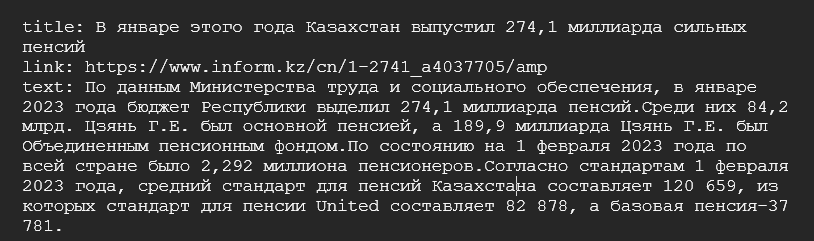

In [ ]:
import sys

while True:
  user_input = input(f"Input Prompt: ")
  if user_input == 'exit':
    print('Exiting')
    sys.exit()
  if user_input == '':
    continue
  result = qa({'query': user_input})
  print(f"Answer: {result['result']}")

In [30]:
def format_qa_result(result):
    answer = result['result']
    sources = [doc.metadata['source'] for doc in result['documents']]
    urls = ', '.join(sources)
    return f"Answer: {answer}\nSource(s): {urls}"

class CustomRetrievalQA(RetrievalQA):
    def run(self, query):
        result = super().run(query)
        return format_qa_result(result)

In [23]:
def translate_to_russian(text, source_lang='en', target_lang='ru'):
    from transformers import MarianMTModel, MarianTokenizer

    model_name = f'Helsinki-NLP/opus-mt-{source_lang}-{target_lang}'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    translated = model.generate(**tokenizer(text, return_tensors="pt", padding=True))
    return tokenizer.decode(translated[0], skip_special_tokens=True)

In [33]:
qa = CustomRetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=vector_store.as_retriever(search_kwargs={"k": 2}))

In [34]:
query = "Какой самый популярный вид цветов, импортируемых из Казахстана, и его количество?"

In [ ]:
qa.run(query)

Llama.generate: prefix-match hit


In [ ]:
query = "Сколько дней отпуска в общей сложности будет у жителей Харбина в течение месяца Весеннего фестиваля в этом году?"

In [ ]:
qa.run(query)

In [32]:
import sys

while True:
    user_input = input("Введите запрос: ")
    if user_input.lower() == 'exit':
        print('Выход')
        sys.exit()
    if user_input.strip() == '':
        continue
    result = qa({'query': user_input})
    answer = result['result']
    answer_in_russian = translate_to_russian(answer, source_lang='en', target_lang='ru')
    print(f"Ответ: {answer_in_russian}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
Llama.generate: prefix-match hit

llama_print_timings:        load time =    3405.66 ms
llama_print_timings:      sample time =       4.41 ms /    10 runs   (    0.44 ms per token,  2269.63 tokens per second)
llama_print_timings: prompt eval time = 1789265.13 ms /  3608 tokens (  495.92 ms per token,     2.02 tokens per second)
llama_print_timings:        eval time =    7330.07 ms /    10 runs   (  733.01 ms per token,     1.36 tokens per second)
llama_print_timings:       total time = 1796680.82 ms /  3618 tokens


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/307M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Ответ: Он не был конкретно указан в данном контексте.
Введите запрос: Какие действия объявил премьер-министр Новой Зеландии в ответ на циклон Габриэль?


Llama.generate: prefix-match hit

llama_print_timings:        load time =    3405.66 ms
llama_print_timings:      sample time =      96.61 ms /   168 runs   (    0.58 ms per token,  1738.93 tokens per second)
llama_print_timings: prompt eval time = 1527586.84 ms /  3199 tokens (  477.52 ms per token,     2.09 tokens per second)
llama_print_timings:        eval time =  125657.80 ms /   167 runs   (  752.44 ms per token,     1.33 tokens per second)
llama_print_timings:       total time = 1653574.01 ms /  3366 tokens
/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Ответ: Премьер-министр Новой Зеландии Джасинда Ардерн объявила о ряде мер, принятых в связи с циклоном Гавриил, заявила, что 13 марта шесть регионов, включая Окленд, получили статус лавины. 13 марта метеорологический департамент Новой Зеландии предсказал, что по мере движения циклона к юго-востоку он в будущем окажет воздействие на столицу, Висперон и Южный остров. Премьер-министр подчеркнул, что здоровье и безопасность тех, кто защищает здоровье страны, имеют исключительно важное значение. Она также объявила о модернизации университета в местном колледже гражданской обороны с уделением особого внимания использованию современной технологии. Кроме того, премьер-министр заявил, что правительство обеспечит дополнительное финансирование университета в целях повышения заработной платы спасателей и улучшения социального обеспечения.


KeyboardInterrupt: Interrupted by user